# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 8 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 8]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_8,sin_time,cos_time
14,7.171949,17.262824,17.650673,15.885822,2121.130895,83500000000,32.370061,34.663677,30.308719,0.000000,...,26968.35883,27957.497475,25616.013501,62.960858,1.588138,2.496841,1.536522,1,1.224647e-16,-1.000000e+00
20,7.181019,17.583486,19.298023,16.822755,2113.551707,83500000000,0.000000,0.000000,0.000000,0.000000,...,39597.93354,40566.225157,38465.319003,99.264971,0.874096,1.614558,0.860217,1,1.224647e-16,-1.000000e+00
87,5.136881,17.921942,19.598982,16.462489,2118.859344,73500000000,0.000000,0.000000,0.000000,0.000000,...,37085.29954,37256.455073,34348.245927,89.123599,0.154461,0.184112,0.145983,1,0.000000e+00,1.000000e+00
180,7.245108,17.030897,17.421117,15.850073,2115.888623,83500000000,0.000000,0.000000,0.000000,0.000000,...,36598.46480,36671.764605,34678.512513,103.263943,1.261188,1.623821,1.150654,1,-1.000000e+00,-1.836970e-16
181,4.743570,17.269364,17.970022,17.031733,2117.504373,73500000000,13.912339,14.426880,13.417510,0.000000,...,25940.86379,28452.583547,24055.994734,100.478040,1.341056,1.797792,1.274658,1,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82532,12.366070,4.457111,4.845222,4.293367,4822.933611,83500000000,7.133573,7.398327,6.997204,0.003929,...,52520.24563,54258.242593,50738.624029,59.911834,1.667727,2.472327,1.649817,1,2.588190e-01,9.659258e-01
82533,12.292626,4.496445,4.559748,4.074900,4822.217167,73500000000,0.000000,0.000000,0.000000,0.000000,...,46382.33318,49745.513223,45330.572511,86.947371,0.883154,2.415317,0.799437,1,2.588190e-01,9.659258e-01
82534,12.848060,4.496179,4.871242,4.385426,4824.070455,83500000000,7.931666,8.203054,7.857899,0.055205,...,53280.21500,56264.323810,49759.611359,105.229774,1.209350,2.920373,1.187349,1,2.588190e-01,9.659258e-01
82535,12.714629,4.572546,4.926224,4.242475,4820.074906,73500000000,8.071216,8.423944,7.835229,0.015140,...,60026.79759,60284.717145,57999.730542,54.783968,1.514047,2.564783,1.390613,1,2.588190e-01,9.659258e-01


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021574327AD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021574332D50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021574332F90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002156EA56E10>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.878609048231589


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
10              Frequency  0.991651  0.898512                   15
9             Temperature  0.995885  0.897644                   16
5          TemperatureMin  0.997559  0.897300                   20
6                sin_time  0.997635  0.897284                   19
8            WindSpeedMin  0.997807  0.897248                   17
4               WindSpeed  0.999704  0.896857                   21
2                cos_time  1.003171  0.896141                   23
7          TemperatureMax  1.003774  0.896016                   18
3            WindSpeedMax  1.004037  0.895961                   22
1           WindDirection  1.006090  0.895535                   24
0             SYNOPCode_8  1.007984  0.895142                   25
11               Distance  1.112132  0.872354                   14
12       RelativeHumidity  1.136255  0.866756                   13
13  TemperatureDifference  1.151891  0.863064                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
10,Frequency,0.991651,0.898512,15
9,Temperature,0.995885,0.897644,16
5,TemperatureMin,0.997559,0.897300,20
6,sin_time,0.997635,0.897284,19
8,WindSpeedMin,0.997807,0.897248,17
4,WindSpeed,0.999704,0.896857,21
2,cos_time,1.003171,0.896141,23
7,TemperatureMax,1.003774,0.896016,18
3,WindSpeedMax,1.004037,0.895961,22
1,WindDirection,1.006090,0.895535,24


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\2577233247.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


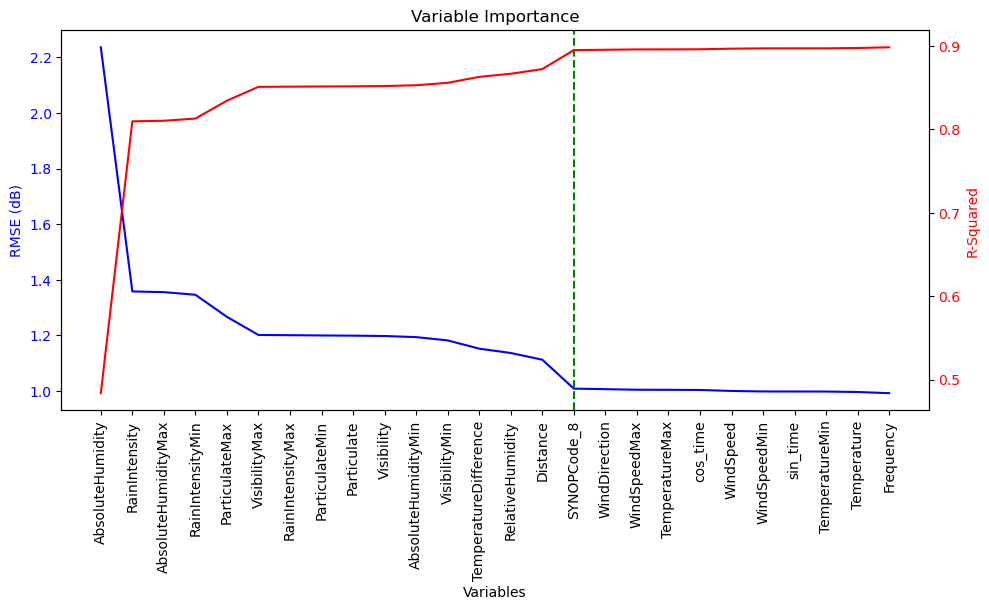

In [29]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [84]:
selected_features_RFL= [
    'SYNOPCode_8',
    'Distance',
    'RelativeHumidity',
    'TemperatureDifference',
    'VisibilityMin',
    'AbsoluteHumidityMin',
    'Visibility',
    'Particulate',
    'ParticulateMin',
    'RainIntensityMax',
    'VisibilityMax',
    'ParticulateMax',
    'RainIntensityMin',
    'AbsoluteHumidityMax',
    'RainIntensity',
    'AbsoluteHumidity'
]

In [85]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 1.1023129965012415
Test R^2: 0.8581340881976947


In [33]:
 0.8581340881976947

0.8581340881976947

In [34]:
selected_features_RFL1= [
    'SYNOPCode_8',
    'Distance',
    'RelativeHumidity',
    'TemperatureDifference',
#    'VisibilityMin',
#    'AbsoluteHumidityMin',
#    'Visibility',
#    'Particulate',
#    'ParticulateMin',
#    'RainIntensityMax',
    'VisibilityMax',
    'ParticulateMax',
#    'RainIntensityMin',
#    'AbsoluteHumidityMax',
    'RainIntensity',
    'AbsoluteHumidity'
]

In [35]:
# Select only the chosen features for training and testing
X_train_selected_RFL1 = X_train_RFL[selected_features_RFL1]
X_test_selected_RFL1 = X_test_RFL[selected_features_RFL1]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL1= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL1.fit(X_train_selected_RFL1, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL1 = final_model_RFL1.predict(X_test_selected_RFL1)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL1= mean_squared_error(y_test_RFL, predictions_RFL1, squared=False)
test_r2_RFL1 = r2_score(y_test_RFL, predictions_RFL1)

print(f"Test RMSE: {test_rmse_RFL1}")
print(f"Test R^2: {test_r2_RFL1}")


Test RMSE: 1.0779449691678542
Test R^2: 0.8643370120961424


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 8 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 8]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_8,sin_time,cos_time
14,9.649171,17.262824,17.650673,15.885822,2121.130895,83500000000,32.370061,34.663677,30.308719,0.000000,...,26968.35883,27957.497475,25616.013501,62.960858,1.588138,2.496841,1.536522,1,1.224647e-16,-1.000000e+00
20,8.171941,17.583486,19.298023,16.822755,2113.551707,83500000000,0.000000,0.000000,0.000000,0.000000,...,39597.93354,40566.225157,38465.319003,99.264971,0.874096,1.614558,0.860217,1,1.224647e-16,-1.000000e+00
87,7.535523,17.921942,19.598982,16.462489,2118.859344,73500000000,0.000000,0.000000,0.000000,0.000000,...,37085.29954,37256.455073,34348.245927,89.123599,0.154461,0.184112,0.145983,1,0.000000e+00,1.000000e+00
180,7.707559,17.030897,17.421117,15.850073,2115.888623,83500000000,0.000000,0.000000,0.000000,0.000000,...,36598.46480,36671.764605,34678.512513,103.263943,1.261188,1.623821,1.150654,1,-1.000000e+00,-1.836970e-16
181,8.356710,17.269364,17.970022,17.031733,2117.504373,73500000000,13.912339,14.426880,13.417510,0.000000,...,25940.86379,28452.583547,24055.994734,100.478040,1.341056,1.797792,1.274658,1,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82532,7.754264,4.457111,4.845222,4.293367,4822.933611,83500000000,7.133573,7.398327,6.997204,0.003929,...,52520.24563,54258.242593,50738.624029,59.911834,1.667727,2.472327,1.649817,1,2.588190e-01,9.659258e-01
82533,7.873959,4.496445,4.559748,4.074900,4822.217167,73500000000,0.000000,0.000000,0.000000,0.000000,...,46382.33318,49745.513223,45330.572511,86.947371,0.883154,2.415317,0.799437,1,2.588190e-01,9.659258e-01
82534,7.809871,4.496179,4.871242,4.385426,4824.070455,83500000000,7.931666,8.203054,7.857899,0.055205,...,53280.21500,56264.323810,49759.611359,105.229774,1.209350,2.920373,1.187349,1,2.588190e-01,9.659258e-01
82535,7.864476,4.572546,4.926224,4.242475,4820.074906,73500000000,8.071216,8.423944,7.835229,0.015140,...,60026.79759,60284.717145,57999.730542,54.783968,1.514047,2.564783,1.390613,1,2.588190e-01,9.659258e-01


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000215775B3A10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021577CC5190>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000215775FC410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021577CCFBD0>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9114135166782843


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
9                cos_time  1.049477  0.931307                   16
8          TemperatureMax  1.057464  0.930257                   17
7               WindSpeed  1.059456  0.929995                   18
10  TemperatureDifference  1.060624  0.929840                   15
5        RainIntensityMax  1.063030  0.929521                   20
4            WindSpeedMin  1.063455  0.929465                   21
6        RainIntensityMin  1.064370  0.929344                   19
12           WindSpeedMax  1.065906  0.929139                   13
11         ParticulateMax  1.067938  0.928869                   14
0             SYNOPCode_8  1.071384  0.928409                   25
3           WindDirection  1.071531  0.928390                   22
1               Frequency  1.071546  0.928388                   24
2           RainIntensity  1.071705  0.928366                   23
15               sin_time  1.078879  0.927404                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
9,cos_time,1.049477,0.931307,16
8,TemperatureMax,1.057464,0.930257,17
7,WindSpeed,1.059456,0.929995,18
10,TemperatureDifference,1.060624,0.929840,15
5,RainIntensityMax,1.063030,0.929521,20
4,WindSpeedMin,1.063455,0.929465,21
6,RainIntensityMin,1.064370,0.929344,19
12,WindSpeedMax,1.065906,0.929139,13
11,ParticulateMax,1.067938,0.928869,14
0,SYNOPCode_8,1.071384,0.928409,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\1670938031.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


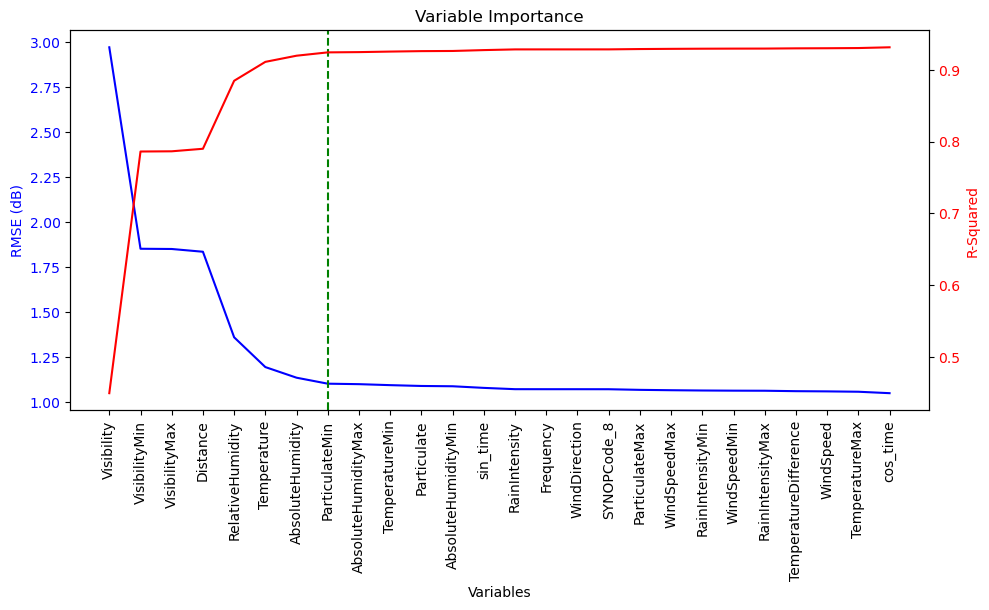

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 7
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [87]:
selected_features_FSO = [
    'ParticulateMin',
    'AbsoluteHumidity',
    'Temperature',
    'RelativeHumidity',
    'Distance',
    'VisibilityMax',
    'VisibilityMin',
    'Visibility'
]


In [88]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.061723890810833
Test R^2: 0.923531966201952


In [26]:
selected_features_FSO1 = [
    'ParticulateMin',
    'AbsoluteHumidity',
    'Temperature',
    'RelativeHumidity',
    'Distance',
 #   'VisibilityMax',
#    'VisibilityMin',
    'Visibility'
]


In [27]:
# Select only the chosen features for training and testing
X_train_selected_FSO1 = X_train_FSO[selected_features_FSO1]
X_test_selected_FSO1 = X_test_FSO[selected_features_FSO1]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO1 = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO1.fit(X_train_selected_FSO1, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO1 = final_model_FSO1.predict(X_test_selected_FSO1)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO1 = mean_squared_error(y_test_FSO, predictions_FSO1, squared=False)
test_r2_FSO1 = r2_score(y_test_FSO, predictions_FSO1)

print(f"Test RMSE: {test_rmse_FSO1}")
print(f"Test R^2: {test_r2_FSO1}")


Test RMSE: 1.0302495010269677
Test R^2: 0.927998495826789


# Plot

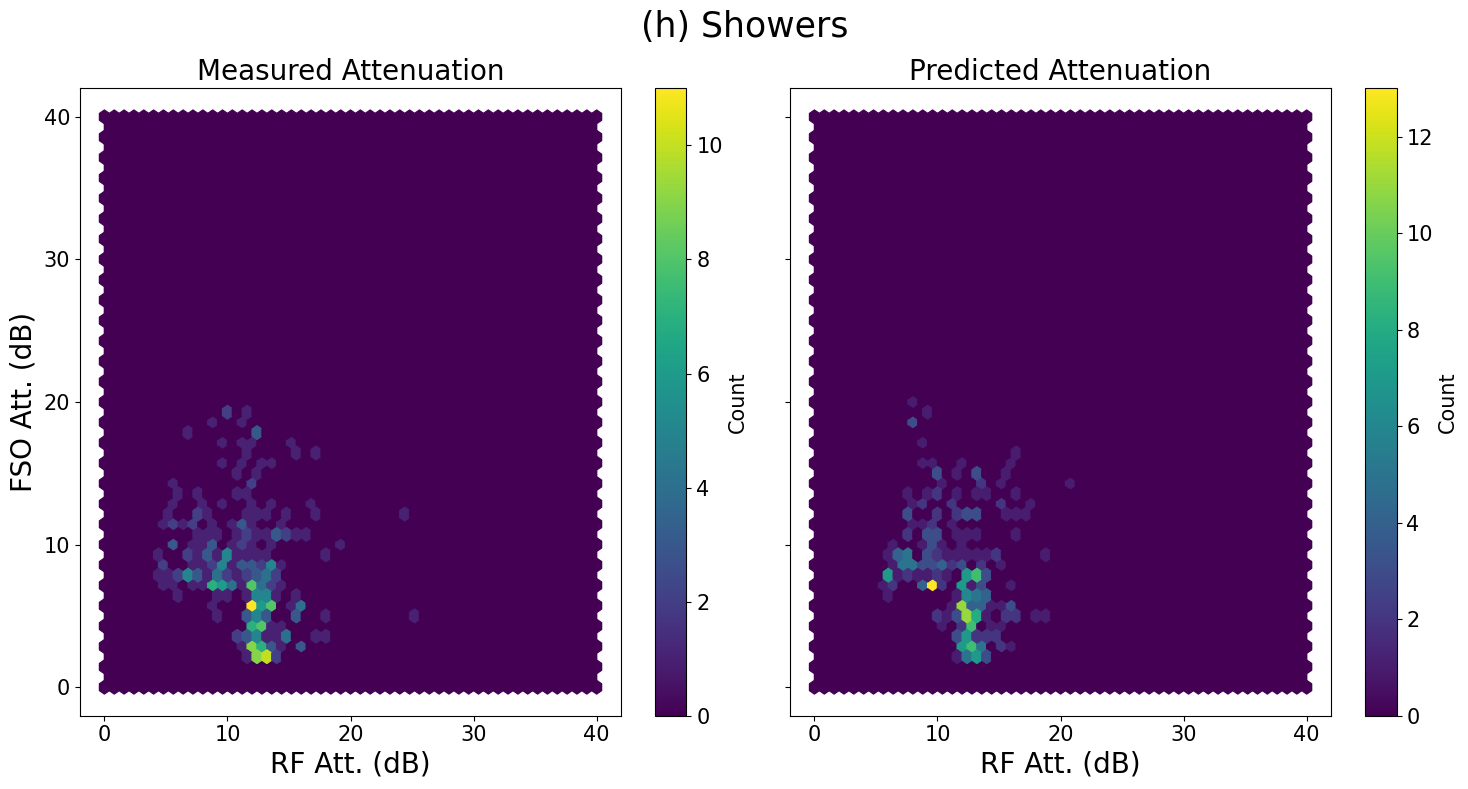

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(h) Showers',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\3901966315.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\3901966315.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


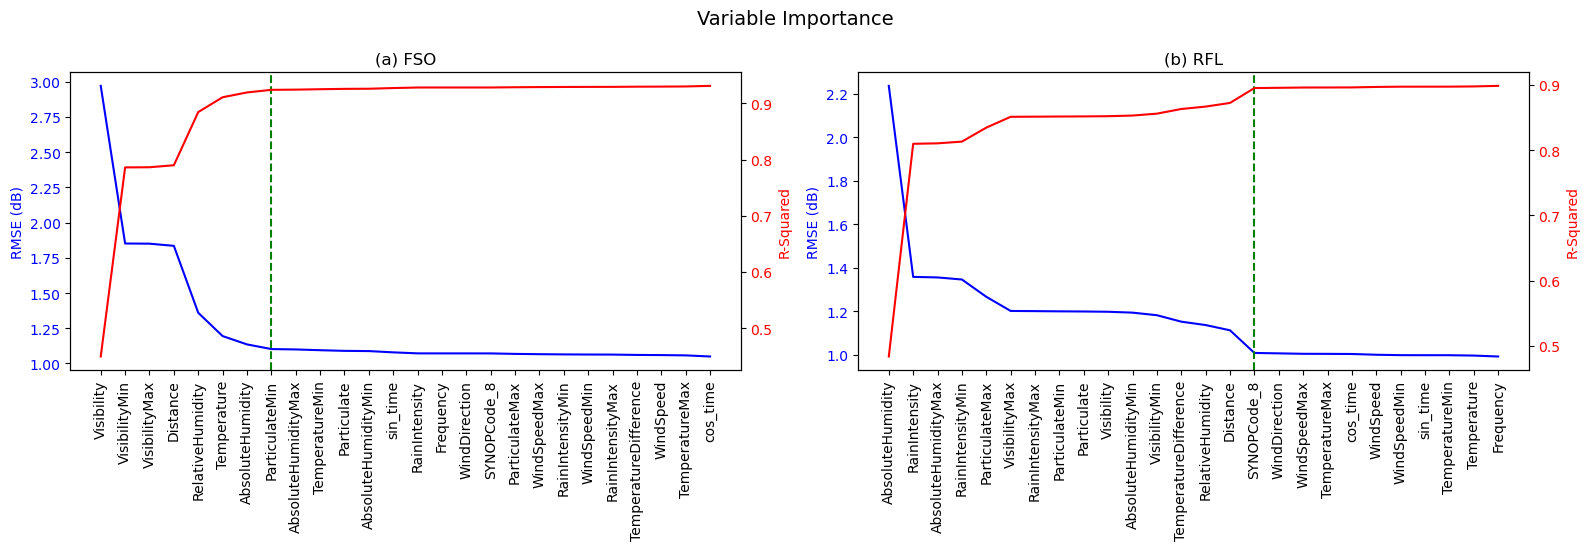

In [78]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))  # Creating subplots side by side with swapped positions

# Plot for RFL
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax1.set_title('(b) RFL')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax1.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Plot for FSO
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax2.set_title('(a) FSO')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 7  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax2.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\265547975.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_14636\265547975.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


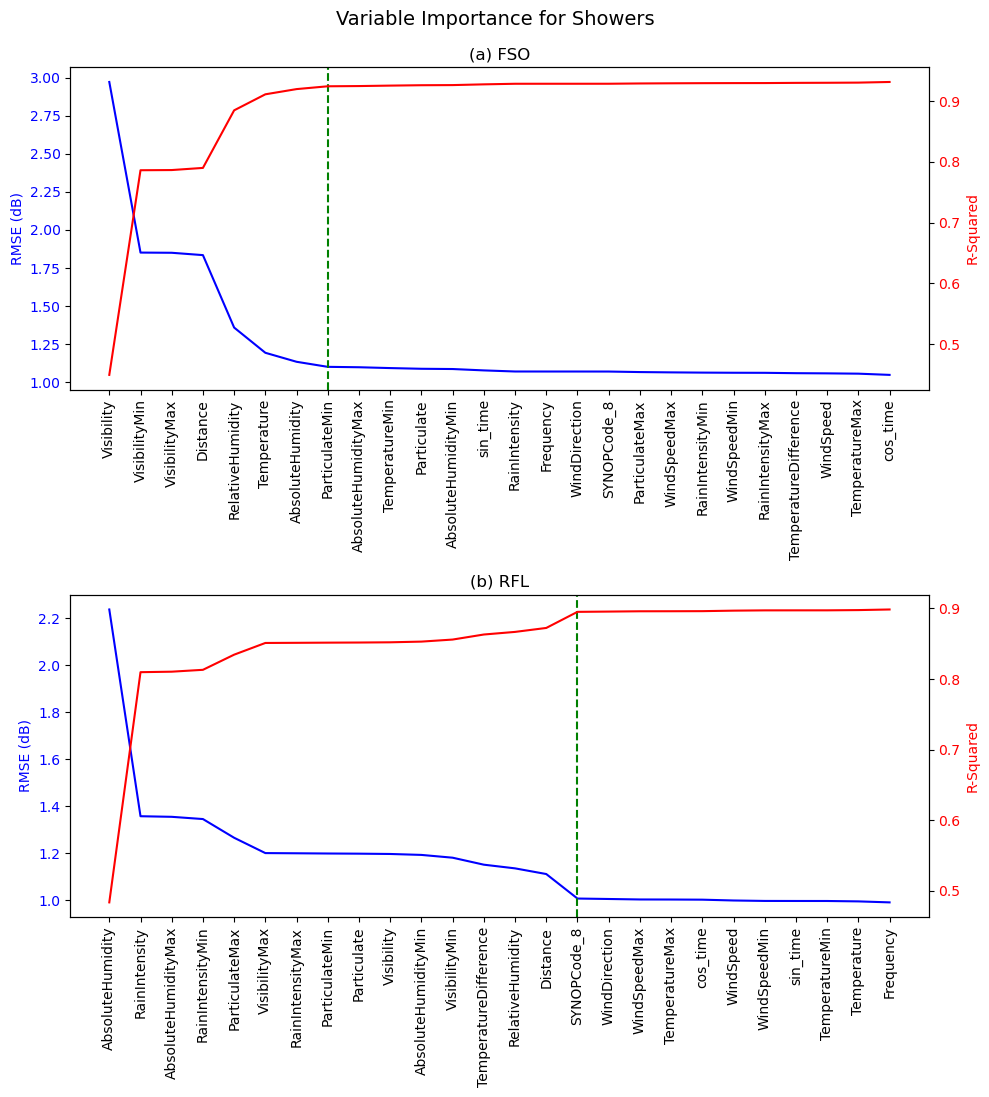

In [94]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 7  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Showers', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
